In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
# Load the data
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
train_df.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [ ]:
train_df.tail(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59980,0,0,0,0,2,0,0,0,0,0,...,37,25,9,0,0,0,0,0,0,0
59981,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59982,5,0,0,0,0,0,0,0,0,0,...,61,58,70,115,114,132,73,0,0,0
59983,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59984,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59985,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59986,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20,126,124,27,0,0
59987,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59988,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59989,4,0,0,0,0,0,0,0,0,0,...,122,131,25,0,0,0,0,0,0,0


In [ ]:
train_df.label.unique

<bound method Series.unique of 0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64>

In [ ]:
train_df.shape


(60000, 785)

In [ ]:
test_df.shape

(10000, 785)

In [ ]:
# Prepare the data
X_train = train_df.iloc[:, 1:].values.astype('float32') / 255.0
y_train = train_df.iloc[:, 0].values.astype('int32')
X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df.iloc[:, 0].values.astype('int32')

In [ ]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train


array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [ ]:
# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 6s 5ms/step - loss: 0.6916 - accuracy: 0.7479 - val_loss: 0.4321 - val_accuracy: 0.8397
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4115 - accuracy: 0.8533 - val_loss: 0.3299 - val_accuracy: 0.8802
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3526 - accuracy: 0.8739 - val_loss: 0.3061 - val_accuracy: 0.8928
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3116 - accuracy: 0.8878 - val_loss: 0.2869 - val_accuracy: 0.8966
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2846 - accuracy: 0.8982 - val_loss: 0.2611 - val_accuracy: 0.9070
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2627 - accuracy: 0.9046 - val_loss: 0.2571 - val_accuracy: 0.9082
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2441 - accuracy: 0.9131 - val_loss: 0.2455 - val_accuracy: 0.9099
Epoch 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2142 - accuracy: 0.9225
Test accuracy: 0.9225000143051147


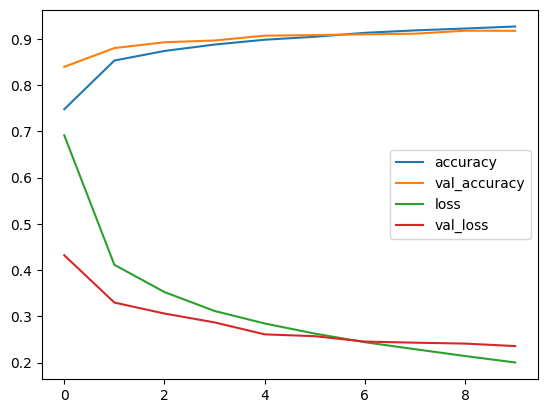

In [ ]:
# Plot the accuracy and loss for training and validation data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
model.save('fashion_mnist_cnn.h5')


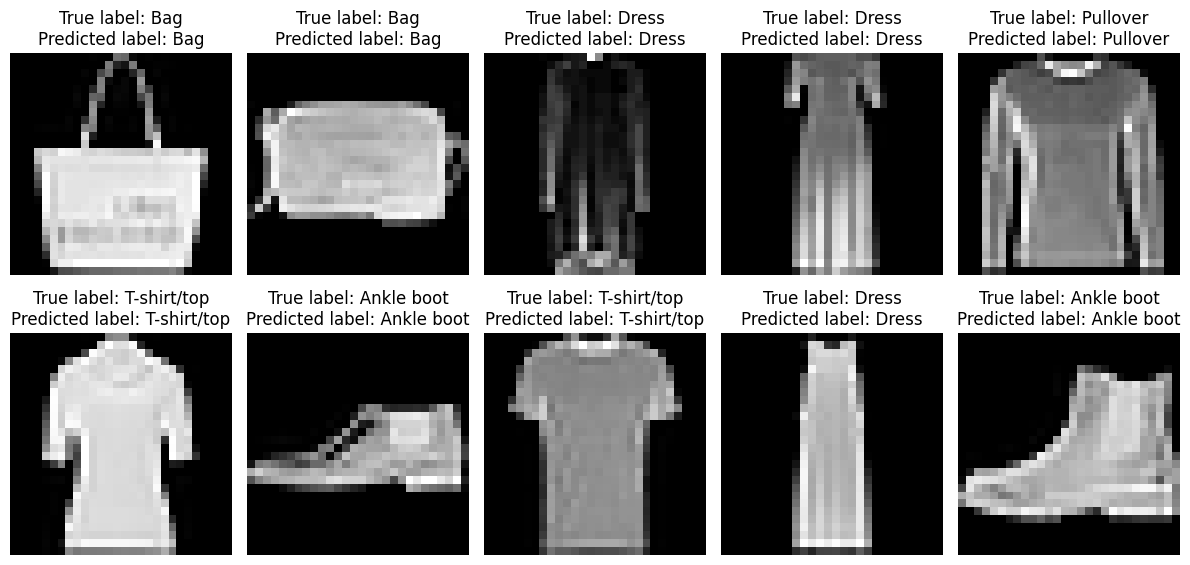

In [ ]:
# Load the saved model
model = load_model('fashion_mnist_cnn.h5')

# Load the test dataset
test_data = pd.read_csv('fashion-mnist_test.csv')

# Extract the image data and labels
test_images = np.array(test_data.iloc[:, 1:])
test_labels = np.array(test_data.iloc[:, 0])

# Define the labels dictionary
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Choose 10 random images from the test set
indices = np.random.choice(test_images.shape[0], size=10, replace=False)
images = test_images[indices]
true_labels = test_labels[indices]

# Reshape the images to a 4D array
images = images.reshape(-1, 28, 28, 1)

# Make predictions on the images
predictions = model.predict(images)

# Plot the images with their true labels and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
axes = axes.flatten()
for i, ax in enumerate(axes):
    # Plot the image
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title('True label: {}\nPredicted label: {}'.format(labels[true_labels[i]], labels[np.argmax(predictions[i])]))
    ax.axis('off')
plt.tight_layout()
plt.show()